In [45]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np

# For visualisation 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Dependencies for preprocessing data for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

# Dependencies for nueural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

# Dependencies for SVR model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# # imports for database connection
# import sqlalchemy
# from sqlalchemy.ext.automap import automap_base
# from sqlalchemy import create_engine, func

# # import these to view table column headers & rows
# from sqlalchemy.orm import sessionmaker
# from sqlalchemy import select


In [46]:
# load in the files
file = Path("../Resources/StringencyColumns.csv")

# read the files
df= pd.read_csv(file)


In [47]:
# Check StringencyColumns.csv
print(df.dtypes)


Unnamed: 0                                int64
date                                     object
iso_code                                 object
C1_School closing                       float64
C1_Flag                                 float64
C2_Workplace closing                    float64
C2_Flag                                 float64
C3_Cancel public events                 float64
C3_Flag                                 float64
C4_Restrictions on gatherings           float64
C4_Flag                                 float64
C5_Close public transport               float64
C5_Flag                                 float64
C6_Stay at home requirements            float64
C6_Flag                                 float64
C7_Restrictions on internal movement    float64
C7_Flag                                 float64
C8_International travel controls        float64
H1_Public information campaigns         float64
H1_Flag                                 float64
total_cases                             

In [48]:
df.columns

Index(['Unnamed: 0', 'date', 'iso_code', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'H1_Public information campaigns',
       'H1_Flag', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths'],
      dtype='object')

In [49]:
# Encode the date column to int
le = LabelEncoder()
df['date'] = le.fit_transform(df['date'])
print(df.dtypes)


Unnamed: 0                                int64
date                                      int32
iso_code                                 object
C1_School closing                       float64
C1_Flag                                 float64
C2_Workplace closing                    float64
C2_Flag                                 float64
C3_Cancel public events                 float64
C3_Flag                                 float64
C4_Restrictions on gatherings           float64
C4_Flag                                 float64
C5_Close public transport               float64
C5_Flag                                 float64
C6_Stay at home requirements            float64
C6_Flag                                 float64
C7_Restrictions on internal movement    float64
C7_Flag                                 float64
C8_International travel controls        float64
H1_Public information campaigns         float64
H1_Flag                                 float64
total_cases                             

In [50]:
df=df[['date', 'iso_code', 'C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings',
       'C5_Close public transport','C6_Stay at home requirements','C7_Restrictions on internal movement',
       'C8_International travel controls', 'H1_Public information campaigns',
       'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]

df

date iso_code  C1_School closing  C2_Workplace closing  \
0        72      ABW                0.0                   0.0   
1        78      ABW                3.0                   0.0   
2        79      ABW                3.0                   0.0   
3        80      ABW                3.0                   2.0   
4        81      ABW                3.0                   2.0   
...     ...      ...                ...                   ...   
48523   239      ZWE                0.0                   0.0   
48524   240      ZWE                0.0                   0.0   
48525   241      ZWE                0.0                   0.0   
48526   242      ZWE                0.0                   0.0   
48527   243      ZWE                0.0                   0.0   

       C3_Cancel public events  C4_Restrictions on gatherings  \
0                          0.0                            0.0   
1                          0.0                            0.0   
2                          0.0                            0.0   
3                          0.0                            0.0   
4                          0.0                            0.0   
...                        ...                            ...   
48523                      0.0                            0.0   
48524                      0.0                            0.0   
48525                      0.0                            0.0   
48526                      0.0                            0.0   
48527                      0.0                            0.0   

       C5_Close public transport  C6_Stay at home requirements  \
0                            0.0                           0.0   
1                            0.0                           0.0   
2                            0.0                           0.0   
3                            0.0                           1.0   
4                            0.0                           1.0   
...                          ...                           ...   
48523                        0.0                           0.0   
48524                        0.0                           0.0   
48525                        0.0                           0.0   
48526                        0.0                           0.0   
48527                        0.0                           0.0   

       C7_Restrictions on internal movement  C8_International travel controls  \
0                                       0.0                               0.0   
1                                       0.0                               4.0   
2                                       0.0                               4.0   
3                                       0.0                               4.0   
4                                       0.0                               4.0   
...                                     ...                               ...   
48523                                   0.0                               0.0   
48524                                   0.0                               0.0   
48525                                   0.0                               0.0   
48526                                   0.0                               0.0   
48527                                   0.0                               0.0   

       H1_Public information campaigns  total_cases  total_deaths  new_cases  \
0                                  0.0          2.0           0.0        2.0   
1                                  2.0          2.0           0.0        0.0   
2                                  2.0          4.0           0.0        2.0   
3                                  2.0          4.0           0.0        0.0   
4                                  2.0          4.0           0.0        0.0   
...                                ...          ...           ...        ...   
48523                              0.0       6251.0         179.0       55.0   
48524                              0.0 

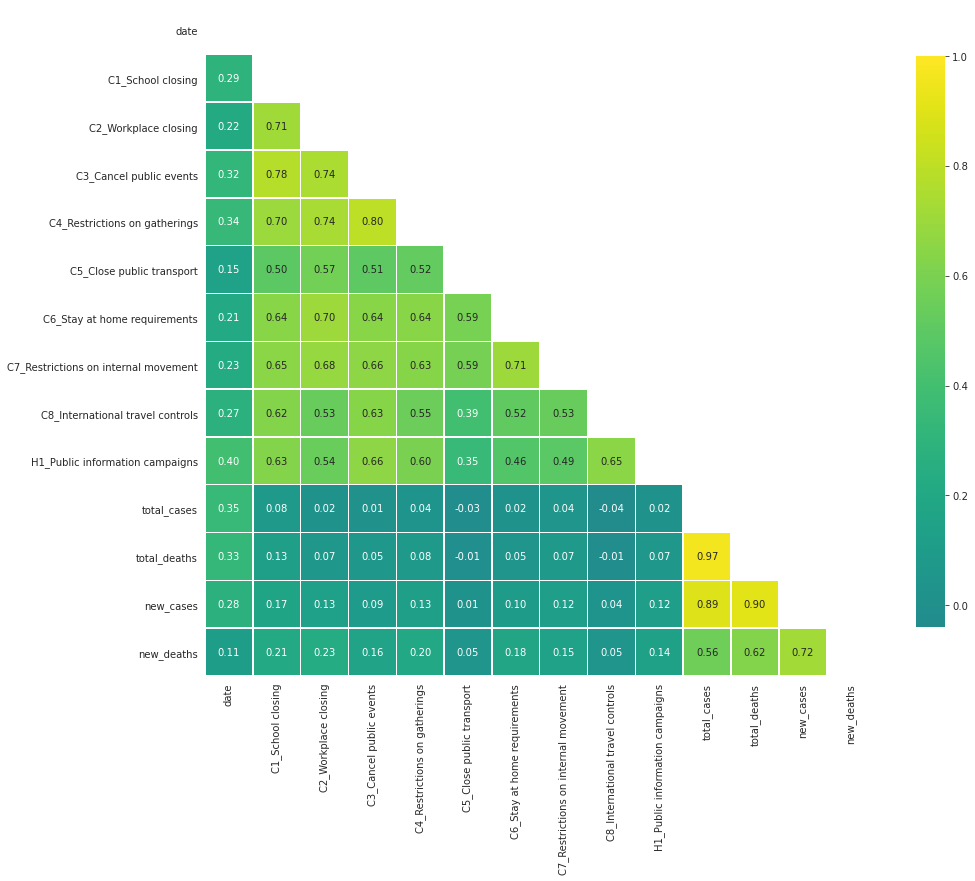

In [52]:
# Checking correlation for feature selection.

def correlation_heatmap(df):
    correlations = df.corr()
    mask = np.zeros_like(correlations)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):

        fig, ax = plt.subplots(figsize=(15,15))
        sns.heatmap(correlations,cmap='viridis', mask=mask,vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

In [17]:
# Create a df to test impact of some features on 'total deaths'
df_td=df[['C1_School closing',
       'C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings','C5_Close public transport',
       'C6_Stay at home requirements','C7_Restrictions on internal movement','C8_International travel controls', 
        'H1_Public information campaigns','total_deaths']]

df_td.head()

C1_School closing  C2_Workplace closing  C3_Cancel public events  \
0                0.0                   0.0                      0.0   
1                3.0                   0.0                      0.0   
2                3.0                   0.0                      0.0   
3                3.0                   2.0                      0.0   
4                3.0                   2.0                      0.0   

   C4_Restrictions on gatherings  C5_Close public transport  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   

   C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                           0.0                                   0.0   
1                           0.0                                   0.0   
2                           0.0                                   0.0   
3                           1.0                                   0.0   
4                           1.0                                   0.0   

   C8_International travel controls  H1_Public information campaigns  \
0                               0.0                              0.0   
1                               4.0                              2.0   
2                               4.0                              2.0   
3                               4.0                              2.0   
4                               4.0                              2.0   

   total_deaths  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

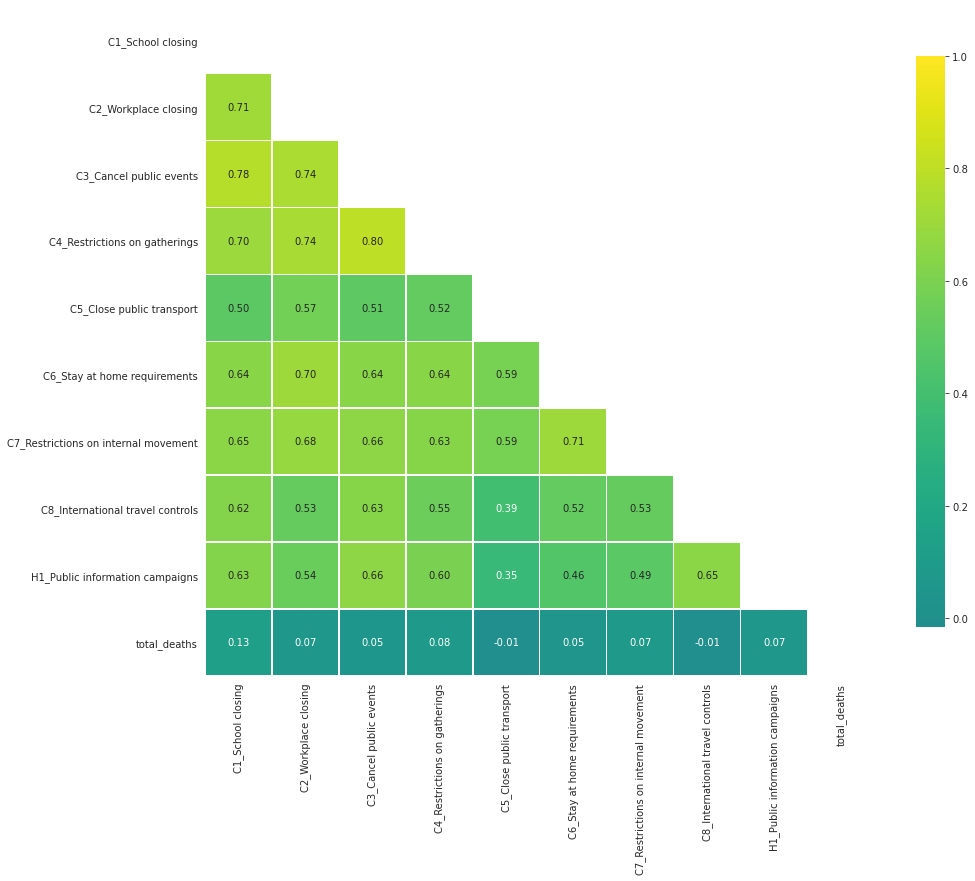

In [18]:
correlation_heatmap(df_td)


In [16]:
df_td.dtypes

C1_School closing                       float64
C1_Flag                                 float64
C2_Workplace closing                    float64
C2_Flag                                 float64
C3_Cancel public events                 float64
C3_Flag                                 float64
C4_Restrictions on gatherings           float64
C4_Flag                                 float64
C5_Close public transport               float64
C5_Flag                                 float64
C6_Stay at home requirements            float64
C6_Flag                                 float64
C7_Restrictions on internal movement    float64
C7_Flag                                 float64
C8_International travel controls        float64
H1_Public information campaigns         float64
H1_Flag                                 float64
total_deaths                            float64
dtype: object

# RandomForestRegressor


In [53]:
# create features(X) and target(y) sets
X = df_td.drop(['total_deaths'],axis=1).values

y = df_td['total_deaths'].values
y = y.reshape(-1,1)

In [54]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 the mean_squared error is :0.41432 and the r2_score is:0.581
------------------------------------
Feature: 0, Score: 0.08639
Feature: 1, Score: 0.11318
Feature: 2, Score: 0.08443
Feature: 3, Score: 0.07084
Feature: 4, Score: 0.05334
Feature: 5, Score: 0.14617
Feature: 6, Score: 0.20126
Feature: 7, Score: 0.21169
Feature: 8, Score: 0.03270
--------------------------------------


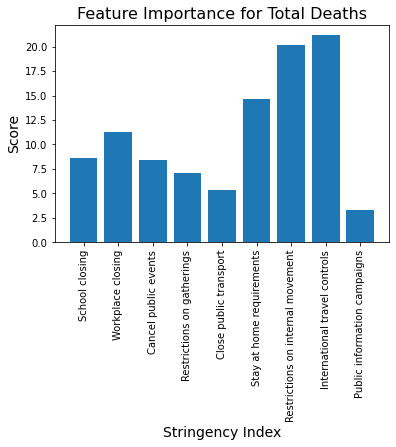

In [77]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_scaled)

# predict y
y_pred=model.predict(X_test_scaled)
# print(y_pred)

# calculate mean square error
mse=mean_squared_error(y_test_scaled,y_pred)

# calculate r2 score
r2=r2_score(y_test_scaled, y_pred)

print(f' the mean_squared error is :{mse:.5f} and the r2_score is:{r2:.3f}')

print('------------------------------------')

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
    
print('--------------------------------------')

# plot feature importance
labels =[ 'School closing',
       'Workplace closing','Cancel public events','Restrictions on gatherings','Close public transport',
       'Stay at home requirements','Restrictions on internal movement','International travel controls', 
        'Public information campaigns']

plt.bar([x for x in range(len(importance))], importance*100)
plt.xticks(range(len(importance)),labels, rotation=90, size=10)
plt.ylabel('Score', size=14)
plt.xlabel('Stringency Index', size=14)
plt.title('Feature Importance for Total Deaths', size=16)
plt.savefig('../Resources/Feature_imp.png', bbox_inches='tight')
plt.show()

In [78]:
importance*100

array([ 8.63907605, 11.31849374,  8.44282929,  7.0839727 ,  5.33438906,
       14.61678136, 20.12558285, 21.16854171,  3.27033325])

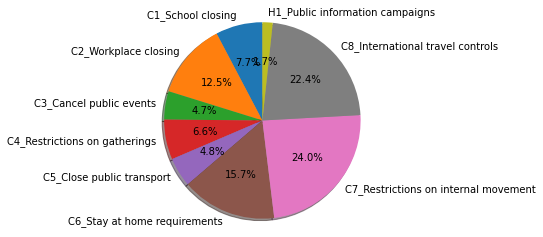

In [57]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels =[ 'C1_School closing',
       'C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings','C5_Close public transport',
       'C6_Stay at home requirements','C7_Restrictions on internal movement','C8_International travel controls', 
        'H1_Public information campaigns']

sizes = [7.7120631 , 12.4870191 ,  4.65656932,  6.58067871,  4.83700802,
       15.65338247, 23.95355105, 22.42831538,  1.69141285]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Total cases Df

In [58]:
# Create a df to test impact of some features on 'total deaths'
df_tc=df[['C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings',
          'C5_Close public transport','C6_Stay at home requirements','C7_Restrictions on internal movement',
          'C8_International travel controls','H1_Public information campaigns','total_cases']]
df_tc.head()

C1_School closing  C2_Workplace closing  C3_Cancel public events  \
0                0.0                   0.0                      0.0   
1                3.0                   0.0                      0.0   
2                3.0                   0.0                      0.0   
3                3.0                   2.0                      0.0   
4                3.0                   2.0                      0.0   

   C4_Restrictions on gatherings  C5_Close public transport  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   

   C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                           0.0                                   0.0   
1                           0.0                                   0.0   
2                           0.0                                   0.0   
3                           1.0                                   0.0   
4                           1.0                                   0.0   

   C8_International travel controls  H1_Public information campaigns  \
0                               0.0                              0.0   
1                               4.0                              2.0   
2                               4.0                              2.0   
3                               4.0                              2.0   
4                               4.0                              2.0   

   total_cases  
0          2.0  
1          2.0  
2          4.0  
3          4.0  
4          4.0

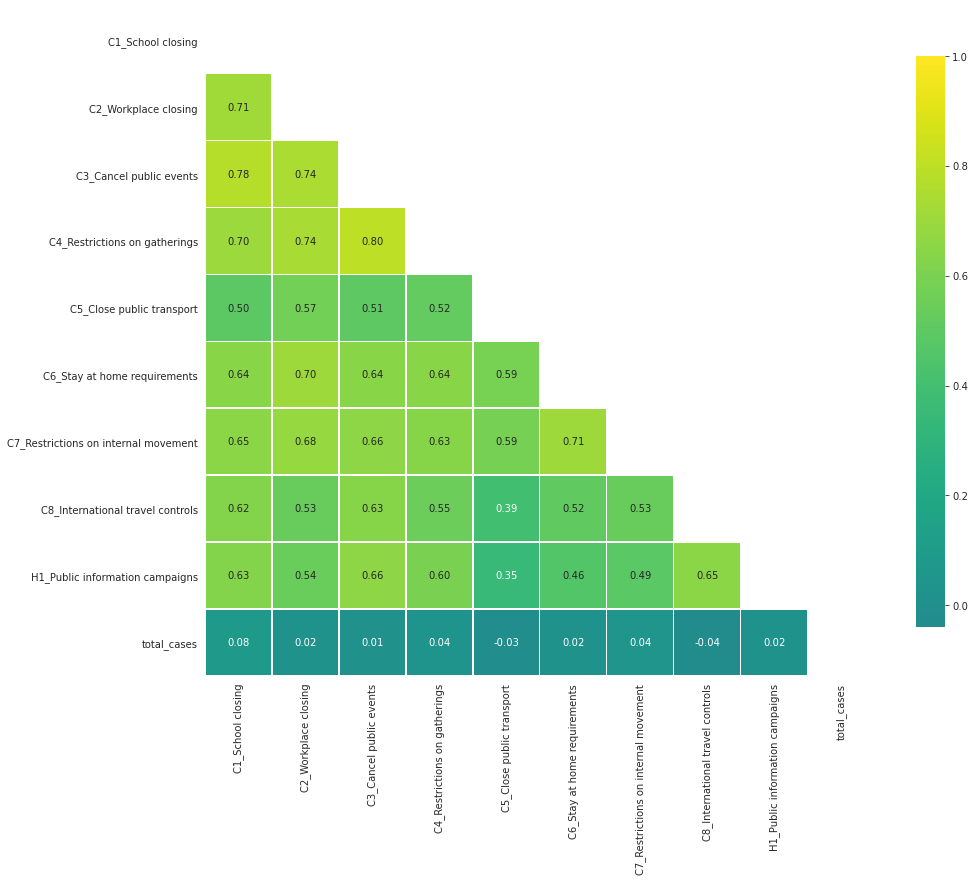

In [59]:
correlation_heatmap(df_tc)

In [60]:
# create features(X) and target(y) sets
X = df_tc.drop(['total_cases'],axis=1).values

y = df_tc['total_cases'].values
y = y.reshape(-1,1)

In [61]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 the mean_squared error is :0.41407 and the r2_score is:0.582
------------------------------------
Feature: 0, Score: 0.08732
Feature: 1, Score: 0.10553
Feature: 2, Score: 0.08218
Feature: 3, Score: 0.07131
Feature: 4, Score: 0.05381
Feature: 5, Score: 0.15523
Feature: 6, Score: 0.19899
Feature: 7, Score: 0.21270
Feature: 8, Score: 0.03293
--------------------------------------


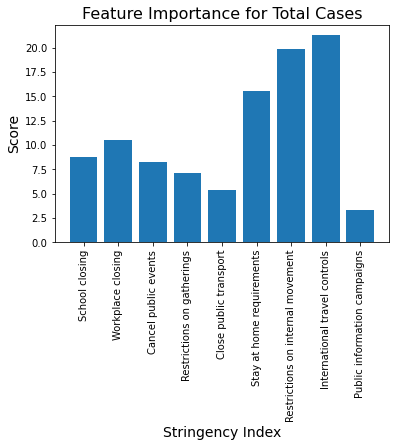

In [75]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_scaled)

# predict y
y_pred=model.predict(X_test_scaled)
# print(y_pred)

# calculate mean square error
mse=mean_squared_error(y_test_scaled,y_pred)

# calculate r2 score
r2=r2_score(y_test_scaled, y_pred)

print(f' the mean_squared error is :{mse:.5f} and the r2_score is:{r2:.3f}')

print('------------------------------------')

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
    
print('--------------------------------------')

# plot feature importance
labels =['School closing','Workplace closing','Cancel public events','Restrictions on gatherings',
          'Close public transport','Stay at home requirements','Restrictions on internal movement',
          'International travel controls','Public information campaigns']

plt.bar([x for x in range(len(importance))], importance*100)
plt.xticks(range(len(importance)),labels, rotation=90, size=10)
plt.ylabel('Score', size=14)
plt.xlabel('Stringency Index', size=14)
plt.title('Feature Importance for Total Cases', size=16)
plt.savefig('../Resources/Feature_imp_tc.png', bbox_inches='tight')
plt.show()